In [37]:
from typing import Callable, Tuple
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification, make_moons 

In [38]:
class Perceptron:
    def __init__(self, input_dim: int, learning_rate: float = 0.01):
        self.weights = np.zeros(input_dim) 
        self.bias = 0.0
        self.learning_rate = learning_rate 

    def predict(self, X: np.ndarray) -> np.ndarray: 
        linear_output = np.dot(X, self.weights) + self.bias 
        return np.where(linear_output >= 0, 1, 0)

    def train(self, X: np.ndarray, y: np.ndarray, epochs: int = 100): 
        for epoch in range(epochs): 
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error


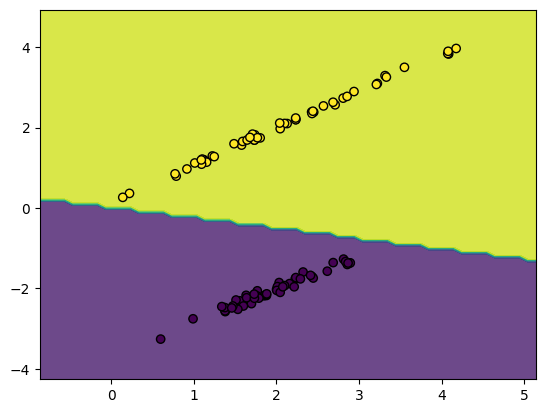

In [39]:
def generate_linear_data() -> Tuple[np.ndarray, np.ndarray]:
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                               n_clusters_per_class=1, class_sep=2.0, random_state=42)
    return X, y 

# Visualize decision boundary
def plot_decision_boundary(model: Perceptron, X: np.ndarray, y: np.ndarray):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

# Training the Perceptron
X_linear, y_linear = generate_linear_data()
perceptron = Perceptron(input_dim=2)
perceptron.train(X_linear, y_linear, epochs=10)
plot_decision_boundary(perceptron, X_linear, y_linear)


In [40]:
class MLP:
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, learning_rate: float = 0.01):
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.bias_hidden = np.zeros(hidden_dim) 
        self.weights_hidden_output = np.random.randn(hidden_dim, output_dim)
        self.bias_output = np.zeros(output_dim)
        self.learning_rate = learning_rate

    def activation(self, x: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-x))  # Sigmoid activation 

    def softmax(self, x: np.ndarray) -> np.ndarray:
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.activation(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.softmax(final_input)
        return hidden_output, final_output

    def backward(self, X: np.ndarray, y: np.ndarray, hidden_output: np.ndarray, final_output: np.ndarray):
        y_one_hot = np.eye(final_output.shape[1])[y]
        output_error = final_output - y_one_hot
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * hidden_output * (1 - hidden_output)

        grad_weights_hidden_output = np.dot(hidden_output.T, output_error)
        grad_bias_output = np.sum(output_error, axis=0)
        grad_weights_input_hidden = np.dot(X.T, hidden_error)
        grad_bias_hidden = np.sum(hidden_error, axis=0)

        self.weights_hidden_output -= self.learning_rate * grad_weights_hidden_output
        self.bias_output -= self.learning_rate * grad_bias_output
        self.weights_input_hidden -= self.learning_rate * grad_weights_input_hidden
        self.bias_hidden -= self.learning_rate * grad_bias_hidden

    def train(self, X: np.ndarray, y: np.ndarray, epochs: int = 100):
        for epoch in range(epochs):
            hidden_output, final_output = self.forward(X)
            self.backward(X, y, hidden_output, final_output)

    def predict(self, X: np.ndarray) -> np.ndarray:
        _, final_output = self.forward(X)
        return np.argmax(final_output, axis=1)


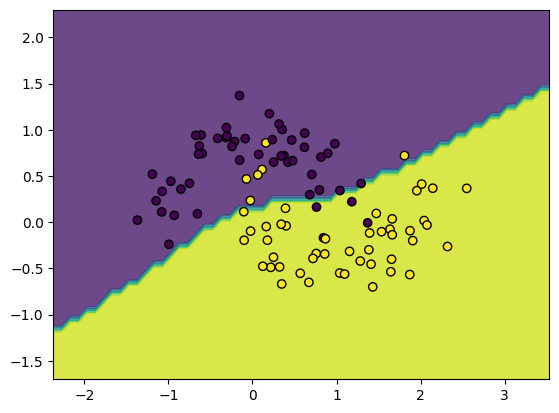

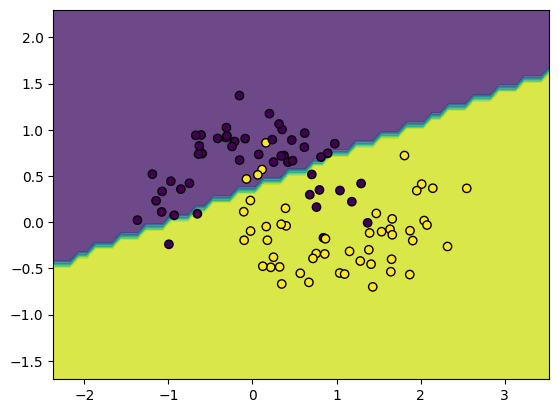

In [41]:

# Generate a non-linearly separable dataset
def generate_nonlinear_data() -> Tuple[np.ndarray, np.ndarray]:
    X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
    return X, y

# Training the MLP
X_nonlinear, y_nonlinear = generate_nonlinear_data()
mlp = MLP(input_dim=2, hidden_dim=5, output_dim=2)
mlp.train(X_nonlinear, y_nonlinear, epochs=500)

# Plot decision boundary for MLP
plot_decision_boundary(mlp, X_nonlinear, y_nonlinear)

# Part 3: Comparison and Analysis
# Train perceptron on non-linear data
perceptron.train(X_nonlinear, y_nonlinear, epochs=10)
plot_decision_boundary(perceptron, X_nonlinear, y_nonlinear)
